In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit


boston_dataset = load_boston()

In [42]:
def func (df,fet1,fet2,a1,a2,b):
    x1 =df["poverty"].values
    x2 =df["Rooms"].values
    y=(a1/x1)+a2*x2+b
    return y

In [43]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df["MEDV"]=boston_dataset.target
df.head(10)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [44]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
df = df.rename(columns={'CRIM': 'Crime_Rate','NOX':'Nitric_Oxides_concentration','CHAS':'River','RM':'Rooms','DIS':'Distance','RAD':'index_accessibility_highways','PTRATIO':'pupil_teacher_ratio','B':'blacks','MEDV':'Price','ZN':'Zoned_lands','INDUS':'non-retail_buiss ','LSTAT':'poverty'})


In [46]:
df.head(10)

,Crime_Rate,Zoned_lands,non-retail_buiss,River,Nitric_Oxides_concentration,Rooms,AGE,Distance,index_accessibility_highways,TAX,pupil_teacher_ratio,blacks,poverty,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crime_Rate                      506 non-null float64
Zoned_lands                     506 non-null float64
non-retail_buiss                506 non-null float64
River                           506 non-null float64
Nitric_Oxides_concentration     506 non-null float64
Rooms                           506 non-null float64
AGE                             506 non-null float64
Distance                        506 non-null float64
index_accessibility_highways    506 non-null float64
TAX                             506 non-null float64
pupil_teacher_ratio             506 non-null float64
blacks                          506 non-null float64
poverty                         506 non-null float64
Price                           506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [48]:
df.describe()

,Crime_Rate,Zoned_lands,non-retail_buiss,River,Nitric_Oxides_concentration,Rooms,AGE,Distance,index_accessibility_highways,TAX,pupil_teacher_ratio,blacks,poverty,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


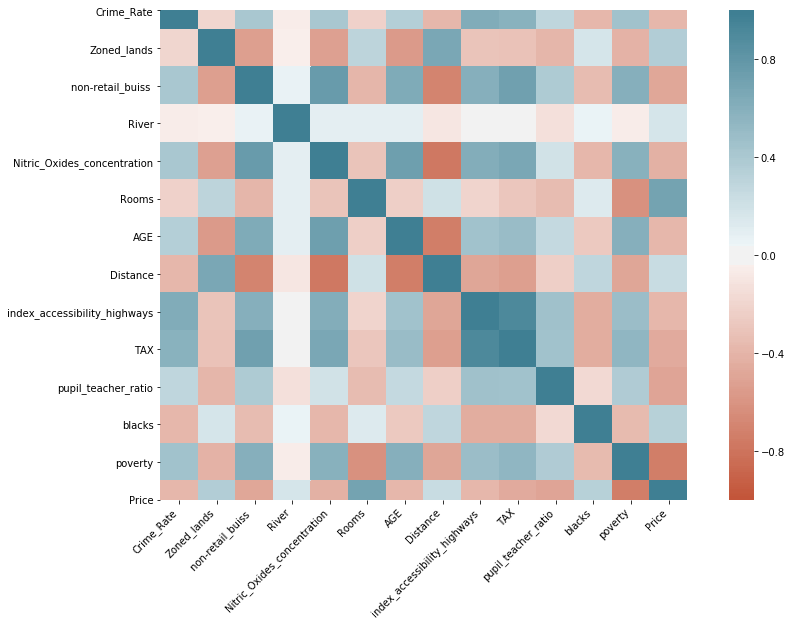

In [49]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

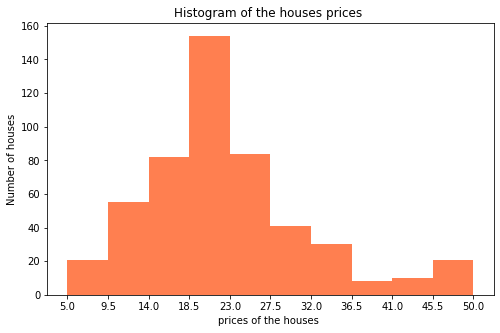

In [50]:
count, bin_edges = np.histogram(df['Price'])
df['Price'].plot(kind='hist', figsize=(8, 5),color='coral',xticks=bin_edges)
plt.title('Histogram of the houses prices ') 
plt.ylabel('Number of houses') 
plt.xlabel('prices of the houses ') 

plt.show()

In [51]:
df.columns

Index(['Crime_Rate', 'Zoned_lands', 'non-retail_buiss ', 'River',
       'Nitric_Oxides_concentration', 'Rooms', 'AGE', 'Distance',
       'index_accessibility_highways', 'TAX', 'pupil_teacher_ratio', 'blacks',
       'poverty', 'Price'],
      dtype='object')

In [52]:
df_important=df[["Crime_Rate","Rooms","Zoned_lands","TAX","poverty","Nitric_Oxides_concentration", "blacks","Price"]]

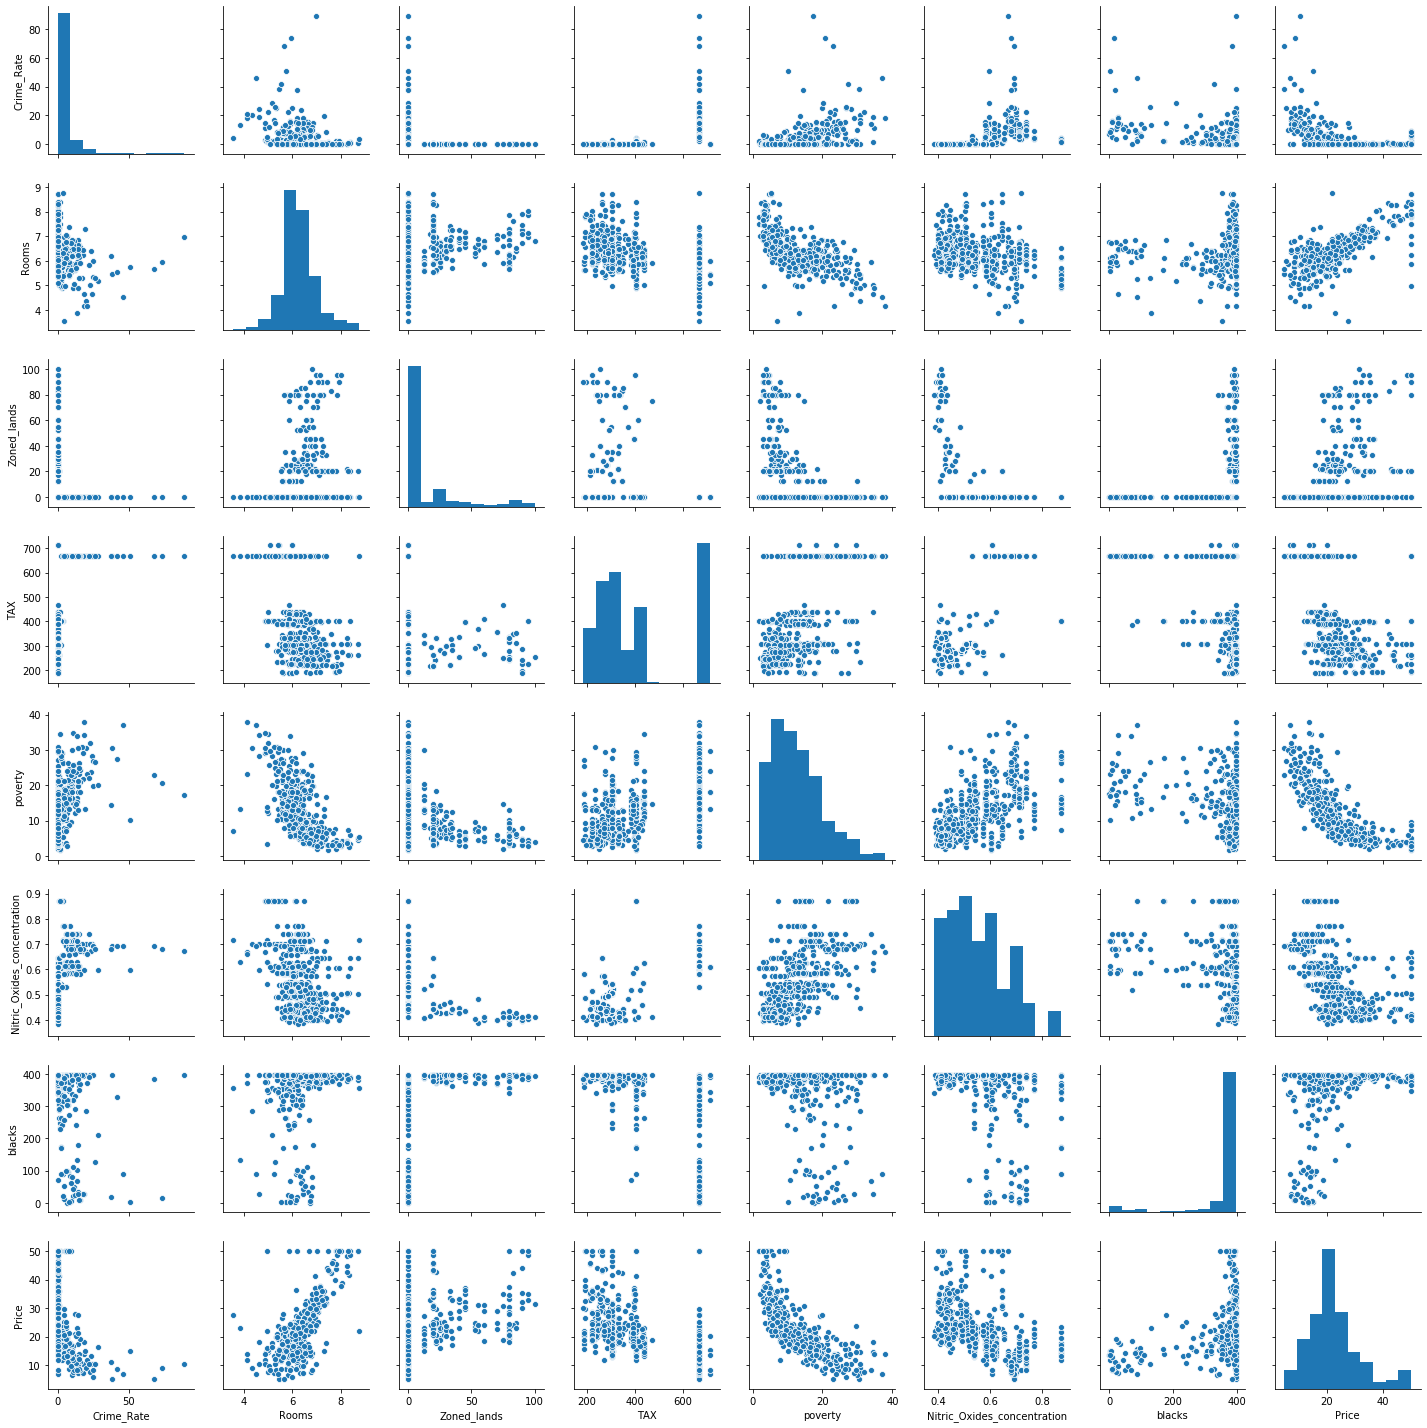

In [53]:
sns.pairplot(df_important)

In [55]:
x=df[["poverty","Rooms"]].values
y=df["Price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=42)
x1=x[:,0]
x2=x[:,1]
#print(np.shape(x))
#print(np.shape(x1))
#print(np.shape(x2))
popt,pcov = curve_fit(func,[x1,x2], y_train)
y_pred=func(x_test,*popt)
MSE=((y_pred-y_test)**2).mean()
print("MSE=",MSE)
RSE=(((y_pred-y_test)**2).sum())/(((y_test-y_test.mean())**2).sum())
R_squared=1-RSE
print("R²=",R_squared)
    



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices